In [64]:
import pandas as pd
import numpy as np
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import pandas as pd
import rew
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 
from collections import Counter
import numpy as np
from sklearn.metrics import confusion_matrix
nltk.download("stopwords")
from keras import callbacks
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import re, string
import nltk

from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#keras
import tensorflow as tf
from tensorflow import keras


#metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Loading Dependencies
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers

from tokenizers import BertWordPieceTokenizer
from tqdm import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from collections import defaultdict

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from keras.callbacks import ReduceLROnPlateau
from keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import plot_model

import transformers
from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification, TrainingArguments
from transformers import TFBertModel, Trainer
from tokenizers import Tokenizer
from transformers import BertTokenizer

import warnings
warnings.filterwarnings('ignore')
from transformers import BertConfig, TFBertForSequenceClassification,TFAutoModelForSequenceClassification

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.metrics import classification_report, accuracy_score, precision_score, f1_score, recall_score
from tqdm.notebook import tqdm
tqdm.pandas()
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout

[nltk_data] Downloading package stopwords to /home/pavel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
# https://www.kaggle.com/datasets/anjaneyatripathi/emotion-classification-nlp/data

In [66]:
dataframe_train = pd.read_csv("dataset/emotion-labels-train.csv")
dataframe_test = pd.read_csv("dataset/emotion-labels-test.csv")
dataframe_validation = pd.read_csv("dataset/emotion-labels-val.csv")

In [67]:
processing_dataframe = pd.concat([dataframe_train, dataframe_test], axis=0)
processing_dataframe = processing_dataframe.sample(frac=1).reset_index(drop=True)

In [68]:
processing_dataframe.text.str.isspace().sum()

0

In [69]:
processing_dataframe.isnull().sum()

text     0
label    0
dtype: int64

In [70]:
processing_dataframe.text.str.isspace().sum()

0

In [71]:
processing_dataframe.head()

,text,label
0,Jk I'm not a loner just really shy 😅,fear
1,What a grim night #GetTheFireLit 🔥,sadness
2,Sometimes people leave you halfway through the...,sadness
3,..... wakes up and says 'have you tried changi...,anger
4,ordered my vacation bathing suits. one less th...,anger


In [72]:
def clean_string(text, stem="None"):
    final_string = ""
    text = text.lower()

    text = re.sub(r'\n', '', text)

    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [73]:
processing_dataframe['clean_text'] = processing_dataframe['text'].apply(lambda x: clean_string(x, "Stem"))
processing_dataframe.head()

,text,label,clean_text
0,Jk I'm not a loner just really shy 😅,fear,jk loner realli shi 😅
1,What a grim night #GetTheFireLit 🔥,sadness,grim night getthefirelit 🔥
2,Sometimes people leave you halfway through the...,sadness,sometim peopl leav halfway wood let griev one ...
3,..... wakes up and says 'have you tried changi...,anger,wake say tri chang nappi 😡👊🏼 rage
4,ordered my vacation bathing suits. one less th...,anger,order vacat bath suit one less thing fret


In [74]:
processing_dataframe['text_len'] = processing_dataframe['clean_text'].apply(len)
processing_dataframe.head()

,text,label,clean_text,text_len
0,Jk I'm not a loner just really shy 😅,fear,jk loner realli shi 😅,21
1,What a grim night #GetTheFireLit 🔥,sadness,grim night getthefirelit 🔥,26
2,Sometimes people leave you halfway through the...,sadness,sometim peopl leav halfway wood let griev one ...,81
3,..... wakes up and says 'have you tried changi...,anger,wake say tri chang nappi 😡👊🏼 rage,33
4,ordered my vacation bathing suits. one less th...,anger,order vacat bath suit one less thing fret,41


[Text(0.5, 0, 'Klasy'),
 Text(0, 0.5, 'Ilość'),
 Text(0.5, 1.0, 'Rozkład ilości poszczególnych klas')]

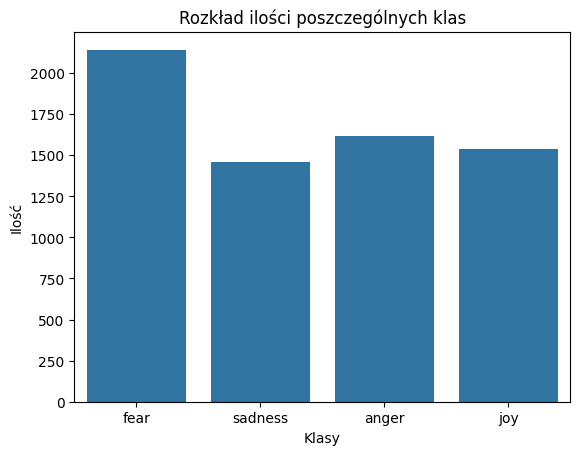

In [75]:
ax = sns.countplot(processing_dataframe, x='label')
ax.set(xlabel='Klasy', ylabel='Ilość', title='Rozkład ilości poszczególnych klas')


In [76]:
processing_dataframe.label.value_counts()
processing_dataframe.head()

,text,label,clean_text,text_len
0,Jk I'm not a loner just really shy 😅,fear,jk loner realli shi 😅,21
1,What a grim night #GetTheFireLit 🔥,sadness,grim night getthefirelit 🔥,26
2,Sometimes people leave you halfway through the...,sadness,sometim peopl leav halfway wood let griev one ...,81
3,..... wakes up and says 'have you tried changi...,anger,wake say tri chang nappi 😡👊🏼 rage,33
4,ordered my vacation bathing suits. one less th...,anger,order vacat bath suit one less thing fret,41


[Text(0.5, 1.0, 'Klasa - Joy'),
 Text(0.5, 0, 'Liczba słów'),
 Text(0, 0.5, 'Gęstość')]

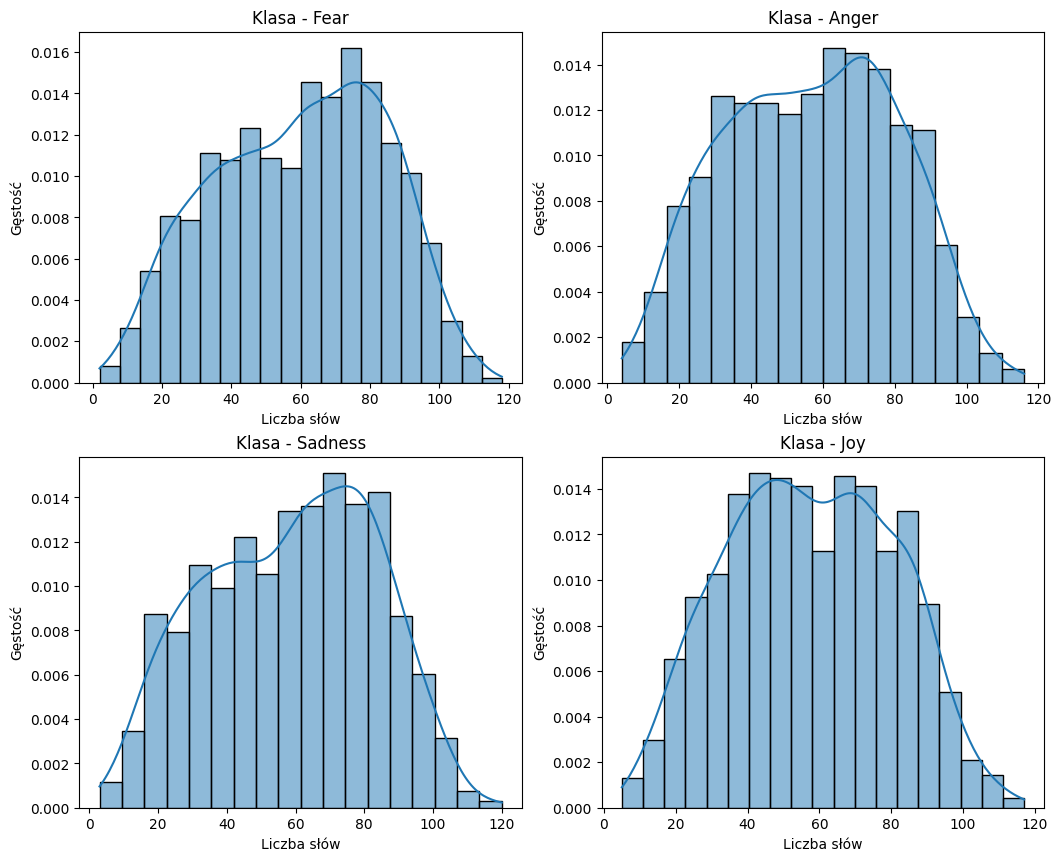

In [77]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10.5, 8.5), layout="constrained")

sns.histplot(processing_dataframe[processing_dataframe['label'] == "fear"].text_len, ax=axs[0,0], kde=True, stat='density').set(title='Klasa - Fear', xlabel='Liczba słów', ylabel='Gęstość')
sns.histplot(processing_dataframe[processing_dataframe['label'] == "anger"].text_len, ax=axs[0,1], kde=True, stat='density').set(title='Klasa - Anger', xlabel='Liczba słów', ylabel='Gęstość')
sns.histplot(processing_dataframe[processing_dataframe['label'] == "sadness"].text_len, ax=axs[1,0], kde=True, stat='density').set(title='Klasa - Sadness', xlabel='Liczba słów', ylabel='Gęstość')
sns.histplot(processing_dataframe[processing_dataframe['label'] == "joy"].text_len, ax=axs[1,1], kde=True, stat='density').set(title='Klasa - Joy', xlabel='Liczba słów', ylabel='Gęstość')


(-0.5, 399.5, 199.5, -0.5)

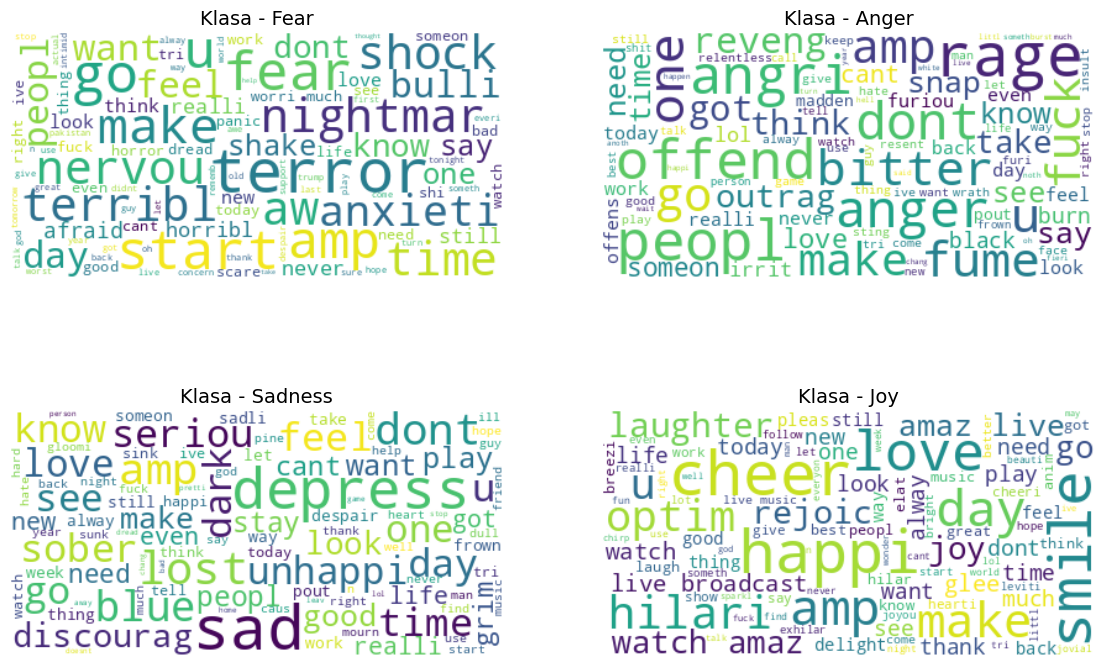

In [78]:
fig, axs = plt.subplots(2, 2, figsize  = (14,9))

wordcloud_joy = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(processing_dataframe[processing_dataframe['label'] == "joy"].clean_text))
wordcloud_sadness = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(processing_dataframe[processing_dataframe['label'] == "sadness"].clean_text))
wordcloud_anger = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(processing_dataframe[processing_dataframe['label'] == "anger"].clean_text))
wordcloud_fear = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(processing_dataframe[processing_dataframe['label'] == "fear"].clean_text))

axs[0,0].imshow(wordcloud_fear, interpolation='bilinear')
axs[0,0].set_title('Klasa - Fear', fontsize=14)
axs[0,0].axis('off')
axs[1,1].imshow(wordcloud_joy, interpolation='bilinear')
axs[1,1].set_title('Klasa - Joy', fontsize=14)
axs[1,1].axis('off')
axs[1,0].imshow(wordcloud_sadness, interpolation='bilinear')
axs[1,0].set_title('Klasa - Sadness', fontsize=14)
axs[1,0].axis('off')
axs[0,1].imshow(wordcloud_anger, interpolation='bilinear')
axs[0,1].set_title('Klasa - Anger', fontsize=14)
axs[0,1].axis('off')


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(processing_dataframe['label'])
processing_dataframe['label_encoded'] = le.transform(processing_dataframe['label'])
integer_mapping = {l: i for i, l in enumerate(le.classes_)}

processing_dataframe.head()

,text,label,clean_text,text_len,label_encoded
0,Jk I'm not a loner just really shy 😅,fear,jk loner realli shi 😅,21,1
1,What a grim night #GetTheFireLit 🔥,sadness,grim night getthefirelit 🔥,26,3
2,Sometimes people leave you halfway through the...,sadness,sometim peopl leav halfway wood let griev one ...,81,3
3,..... wakes up and says 'have you tried changi...,anger,wake say tri chang nappi 😡👊🏼 rage,33,0
4,ordered my vacation bathing suits. one less th...,anger,order vacat bath suit one less thing fret,41,0


In [80]:
def calculate_most_common_word_by_label(df, label: str, len_words: int = 10):
    words = df[df.label==label].clean_text.apply(lambda x: [word.lower() for word in x.split()])
    ham_words = Counter()
    for msg in words:
        ham_words.update(msg)
        
    return ham_words.most_common(len_words)

In [81]:
calculate_most_common_word_by_label(processing_dataframe, "fear", 10)

[('terror', 155),
 ('like', 143),
 ('go', 131),
 ('get', 130),
 ('dont', 127),
 ('fear', 121),
 ('start', 108),
 ('amp', 98),
 ('make', 91),
 ('know', 88)]

In [82]:
calculate_most_common_word_by_label(processing_dataframe, "anger", 10)

[('like', 127),
 ('get', 120),
 ('rage', 113),
 ('dont', 96),
 ('peopl', 91),
 ('offend', 88),
 ('anger', 84),
 ('angri', 84),
 ('one', 75),
 ('bitter', 73)]

In [83]:
calculate_most_common_word_by_label(processing_dataframe, "sadness", 10)

[('sad', 173),
 ('depress', 154),
 ('get', 119),
 ('dont', 99),
 ('lost', 90),
 ('like', 88),
 ('amp', 82),
 ('blue', 78),
 ('time', 70),
 ('know', 69)]

In [84]:
calculate_most_common_word_by_label(processing_dataframe, "joy", 10)

[('happi', 166),
 ('cheer', 142),
 ('live', 141),
 ('smile', 138),
 ('love', 116),
 ('watch', 109),
 ('make', 99),
 ('day', 95),
 ('amp', 94),
 ('hilari', 78)]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
processing_dataframe.head()

,text,label,clean_text,text_len,label_encoded
0,Jk I'm not a loner just really shy 😅,fear,jk loner realli shi 😅,21,1
1,What a grim night #GetTheFireLit 🔥,sadness,grim night getthefirelit 🔥,26,3
2,Sometimes people leave you halfway through the...,sadness,sometim peopl leav halfway wood let griev one ...,81,3
3,..... wakes up and says 'have you tried changi...,anger,wake say tri chang nappi 😡👊🏼 rage,33,0
4,ordered my vacation bathing suits. one less th...,anger,order vacat bath suit one less thing fret,41,0


In [87]:
X = processing_dataframe.clean_text
y = processing_dataframe.label_encoded

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

In [88]:
x_train

2606    bird chirp cow moo need listen sound natur ens...
6195             induct day tomorrow pizza express nervou
2420    peachkellipop whole thread jovial fun comment ...
2842    nessamatthew he perfect even way sort resent s...
4895                         noth relentless dog beg food
                              ...                        
905               caballero pass remain absolut dread see
5192    devilsadvc manutd absolut boringm big manchest...
3980    ynnsaniti mayb that ask studi hard get job lik...
235     vote killari like stick knife toaster shock ma...
5157    unbeliev take  minut get barclaysuk there faul...
Name: clean_text, Length: 5404, dtype: object

In [89]:
tokenizer = AutoTokenizer.from_pretrained('LawalAfeez/emotion_detection')
bert_model = TFAutoModelForSequenceClassification.from_pretrained('LawalAfeez/emotion_detection')

Some layers from the model checkpoint at LawalAfeez/emotion_detection were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at LawalAfeez/emotion_detection and are newly initialized: ['dropout_43']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [90]:
X_train_token = tokenizer(
    text = x_train.tolist(),
    add_special_tokens = True,
    max_length = 36, 
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_attention_mask = True,
    verbose = True)

X_test_token = tokenizer(
    text = x_test.tolist(),
    add_special_tokens = True,
    max_length = 36, 
    truncation = True,
    padding = True, 
    return_tensors = 'tf',
    return_attention_mask = True,
    verbose = True)

In [91]:
X_train_token

{'input_ids': <tf.Tensor: shape=(5404, 36), dtype=int32, numpy=
array([[  101,  4743,  9610, ...,     0,     0,     0],
       [  101, 27427, 14194, ...,     0,     0,     0],
       [  101, 18237, 18690, ...,     0,     0,     0],
       ...,
       [  101,  1061, 10695, ...,     0,     0,     0],
       [  101,  3789,  3102, ...,     0,     0,     0],
       [  101,  4895,  8671, ...,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(5404, 36), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [92]:

input_ids = Input(shape=(36,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(36,), dtype=tf.int32, name="attention_mask")

word_embeddings = bert_model(input_ids,attention_mask=attention_mask)[0]

output = Flatten()(word_embeddings)
output = Dense(units=1024,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=512,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
output = Dense(units=64,activation='relu')(output)
output = Dense(units=4,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_mask],outputs=output)
model.layers

In [93]:
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 36)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 36)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6695808   ['input_ids[0][0]',           
 e_classification_1 (TFDist  (loss=None, logits=(None,    6          'attention_mask[0][0]']      
 ilBertForSequenceClassific  6),                                                            

In [94]:
adam = Adam(learning_rate=5e-5,
           epsilon=2e-8,
           weight_decay=1e-2,
           clipnorm=1.0)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics='categorical_accuracy')

In [95]:
container_callbacks = [
    callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=10, verbose=1),  
]


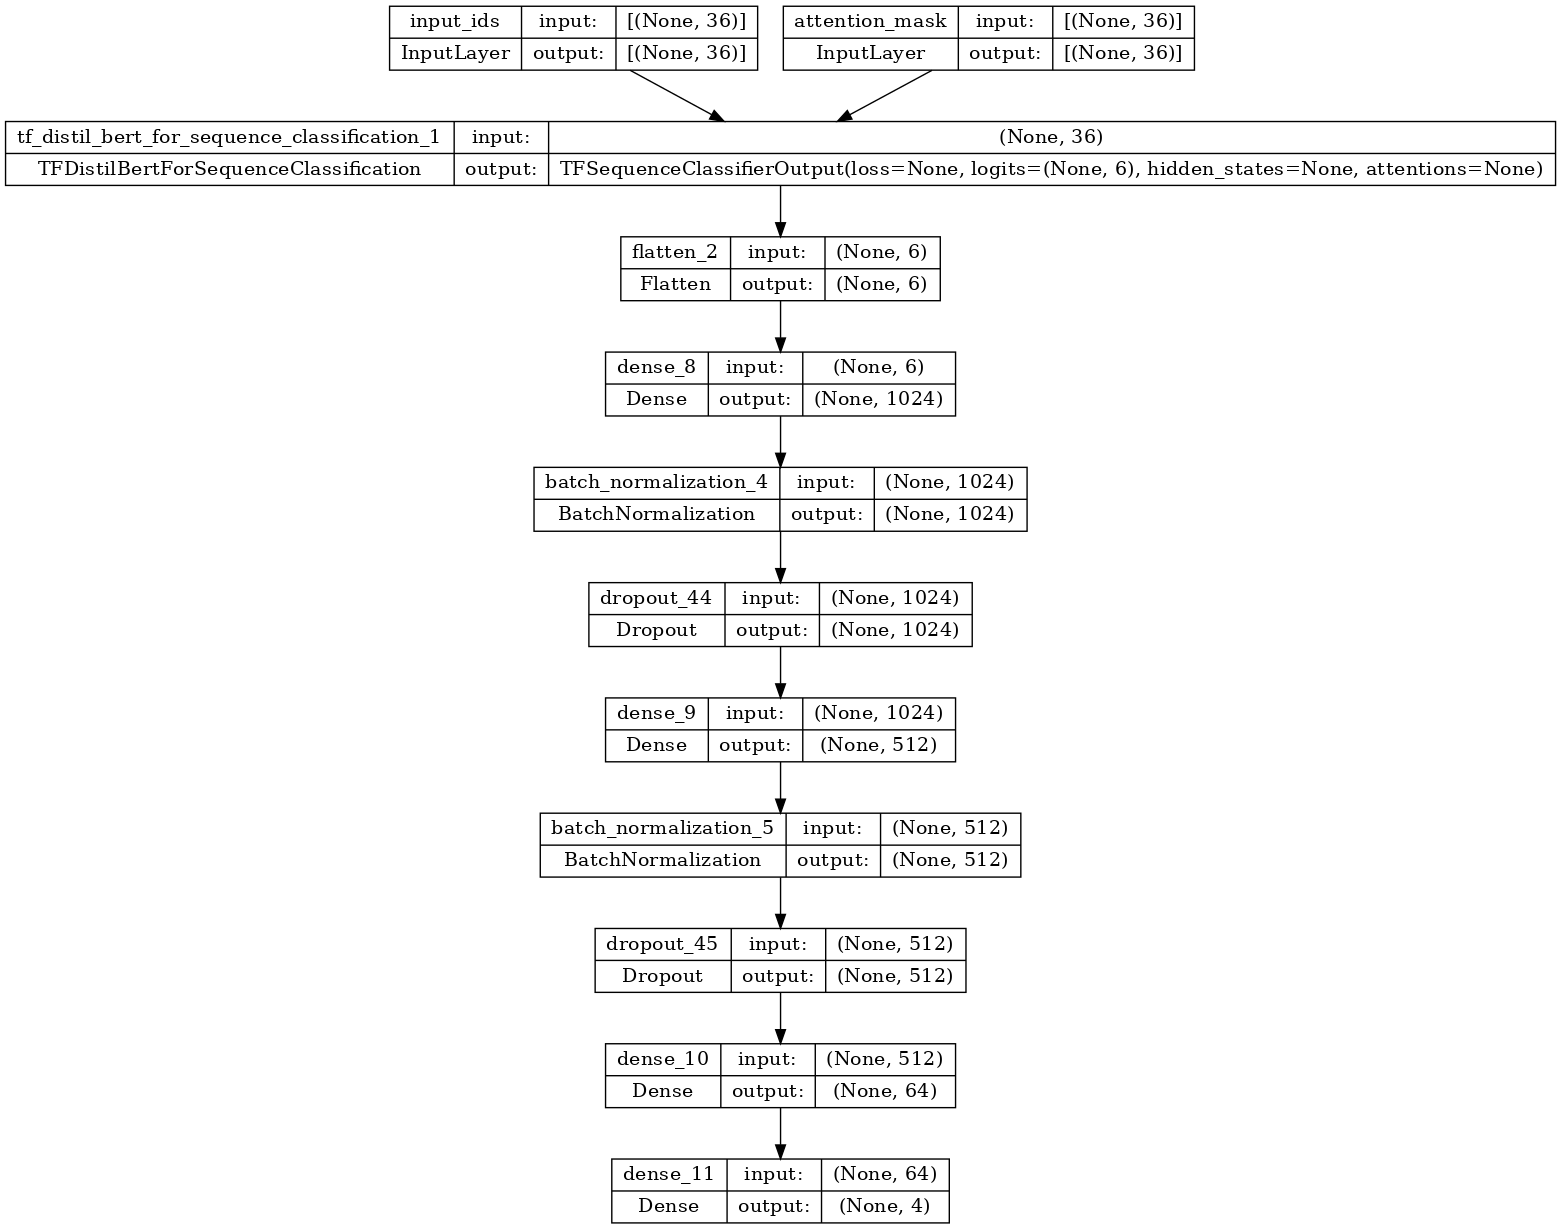

In [96]:
plot_model(model,to_file='bert_models.png',dpi=100,show_shapes=True)

In [99]:
prepared_model = model.fit(
    x = {'input_ids': X_train_token['input_ids'],
         'attention_mask': X_train_token['attention_mask'],
        },
    y = to_categorical(y_train, num_classes=4),
    validation_split = 0.05,
    epochs = 5,
    batch_size = 64,
    callbacks=container_callbacks
)

Epoch 1/5
81/81 [==============================] - 16s 200ms/step - loss: 0.4510 - categorical_accuracy: 0.8473 - val_loss: 0.7879 - val_categorical_accuracy: 0.7934
Epoch 2/5
81/81 [==============================] - 16s 196ms/step - loss: 0.3045 - categorical_accuracy: 0.8954 - val_loss: 0.5073 - val_categorical_accuracy: 0.8118
Epoch 3/5
81/81 [==============================] - 17s 208ms/step - loss: 0.2138 - categorical_accuracy: 0.9277 - val_loss: 0.4735 - val_categorical_accuracy: 0.8598
Epoch 4/5
81/81 [==============================] - 16s 201ms/step - loss: 0.1640 - categorical_accuracy: 0.9431 - val_loss: 0.5066 - val_categorical_accuracy: 0.8229
Epoch 5/5
81/81 [==============================] - 17s 214ms/step - loss: 0.1318 - categorical_accuracy: 0.9519 - val_loss: 0.5830 - val_categorical_accuracy: 0.8229


In [101]:
cm

array([[255,  34,   0,  21],
       [ 12, 391,   2,  33],
       [ 13,  43, 253,  17],
       [ 18,  26,   5, 228]])

43/43 [==============================] - 2s 42ms/step


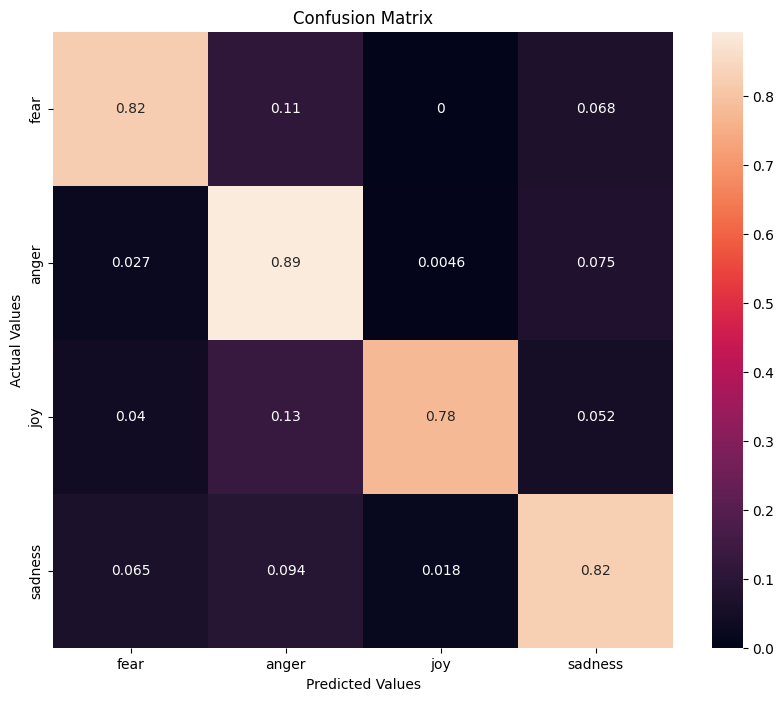

In [103]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred=model.predict({'input_ids': X_test_token['input_ids'], 'attention_mask': X_test_token['attention_mask']})
y_pred=np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred, normalize='true')

cm_df = pd.DataFrame(cm,
                     index = ['fear','anger', 'joy','sadness'], 
                     columns = ['fear','anger', 'joy','sadness'])

plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       310
           1       0.79      0.89      0.84       438
           2       0.97      0.78      0.86       326
           3       0.76      0.82      0.79       277

    accuracy                           0.83      1351
   macro avg       0.85      0.83      0.83      1351
weighted avg       0.84      0.83      0.84      1351



In [ ]:
n_classes = 4
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * n_classes

def format_target_classes_for_roc_curve(data_classes: list[int], n_classes: int) -> list[list[int]]:
    output: list[list] = [0] * len(data_classes)

    for idx, label in enumerate(data_classes):
        output[idx] = np.array([0] * n_classes)
        output[idx][label] = 1
    
    return np.array(output)


y_pred_proba = model.predict({'input_ids': X_test_token['input_ids'], 'attention_mask': X_test_token['attention_mask']})
y_test_for_roc = format_target_classes_for_roc_curve(y_test, 5)

for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_for_roc[::, i],
                                              y_pred_proba[::, i])
    auc_score[i] = auc(fpr[i], tpr[i])

43/43 [==============================] - 2s 44ms/step


In [107]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_df.label, test_predictions))

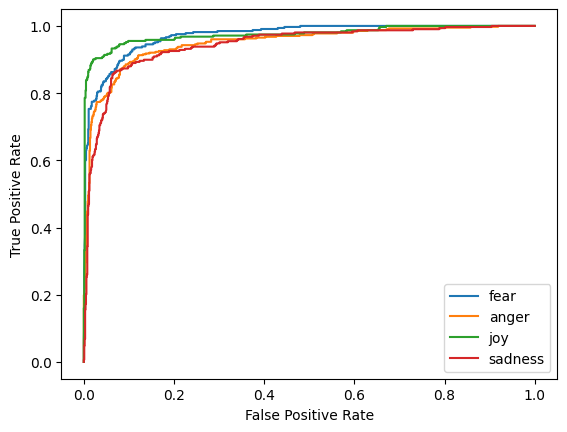

In [106]:
for i in range(n_classes):
    plt.plot(fpr[i],tpr[i])

plt.legend(['fear','anger', 'joy','sadness'], loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [105]:
# model.save('bert_model.keras')